In [2]:
import os
import cv2
import pathlib
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
from PIL import Image

# Creating augmented data

Since the classes are imbalanced, we will create augmented images for the classes with fewer images to balance the dataset. 

In particoular, since the images are chest x_rays, we are going to use horizontal flip to create "duplicates".

In [3]:
directory_path = r'C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train'

for dirpath, dirnames, filenames in os.walk(directory_path):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

There are 7 directories and 0 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train\Atelectasis"
There are 0 directories and 3375 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train\Effusion"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train\Infiltration"
There are 0 directories and 1559 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train\Mass"
There are 0 directories and 2125 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train\Nodule"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train\No_finding"
There are 0 directories and 1614 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X

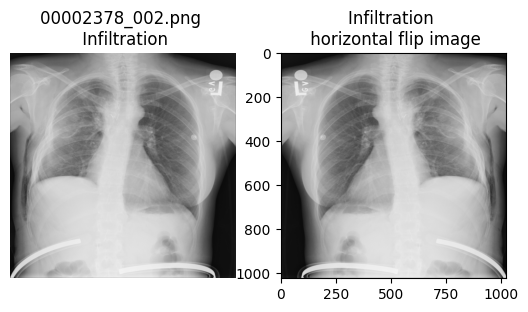

In [4]:


target_dir = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train"
target_class = 'Infiltration'
#set up la directory target, vedremo immagini da qua
target_folder = target_dir + '/' + target_class

#ottengo il path di una immagine casuale
random_image = random.sample(os.listdir(target_folder), 1) # prendi a caso uno degli oggetti in os.listdir(target_folder)

#leggo l'immagine
plt.subplot(1, 2, 1)
img = np.array(Image.open(target_folder + '/' + random_image[0]))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(f'{random_image[0]} \n {target_class}')
plt.axis('off')

# Flip orizzontale con NumPy
immagine_flip_orizzontale = np.fliplr(img)

# Visualizza l'immagine flip orizzontale
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(immagine_flip_orizzontale, cv2.COLOR_BGR2RGB))
plt.title(f'{target_class} \n horizontal flip image')

plt.show()


In [5]:
Finding_labels = ['No_finding', 'Infiltration', 'Effusion', 'Atelectasis', 'Nodule', 'Pneumothorax', 'Mass']

# For each label creating augmented images, until there are 3500 images for each label in every directory
for label in Finding_labels:
    label_path = r"C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train"+"\\"+label
    images_list = os.listdir(label_path)
    number_augmented_images = 3500-len(images_list)
    for image in images_list[:number_augmented_images]:
        origin_path = label_path + '\\' + image
        destination_path = r'C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train_augmented'+"\\"+label

        # Loading the image
        img = Image.open(label_path + '\\' + image)
        # Horizontal flippping the image
        horizontal_flip_img = np.fliplr(img)

        image_destination_path = os.path.join(destination_path, 'flipped'+image)
        Image.fromarray(horizontal_flip_img).save(image_destination_path)

    print(f"all images saved in {label}")


0 Saved all the images in No_finding
0 Saved all the images in Infiltration
125 Saved all the images in Effusion
0 Saved all the images in Atelectasis
1375 Saved all the images in Nodule
1886 Saved all the images in Pneumothorax
1941 Saved all the images in Mass


In [6]:
directory_path = r'C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\1_Datasets\Train_augmented'

for dirpath, dirnames, filenames in os.walk(directory_path):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}"')

There are 7 directories and 0 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train_augmented"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train_augmented\Atelectasis"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train_augmented\Effusion"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train_augmented\Infiltration"
There are 0 directories and 3118 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train_augmented\Mass"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train_augmented\Nodule"
There are 0 directories and 3500 images in "C:\Users\Hp\Documents\Machine_learning_projects\Chest_X_rays\Datasets\Train_augmented\No_finding"
There are 0 directories and 3